# Radiation Modes of Hole waveguide

The N0 Bragg fiber but in 1D.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget


In [2]:
A = SlabExact(scale=1e-6, ts=[1e-6, 2e-6,1e-6],
              ns=[1.44, 1, 1.44], xrefs=[100, 200, 100],
              symmetric=True, wl=1e-6)

In [3]:
field_type = 'TE'
mode_type = 'radiation'
beta = .999*A.K_low
Z = A.Z_from_Beta(beta, n=A.ns[1])

In [4]:
Fs1 = A.fields(beta, field_type=field_type, mode_type=mode_type)


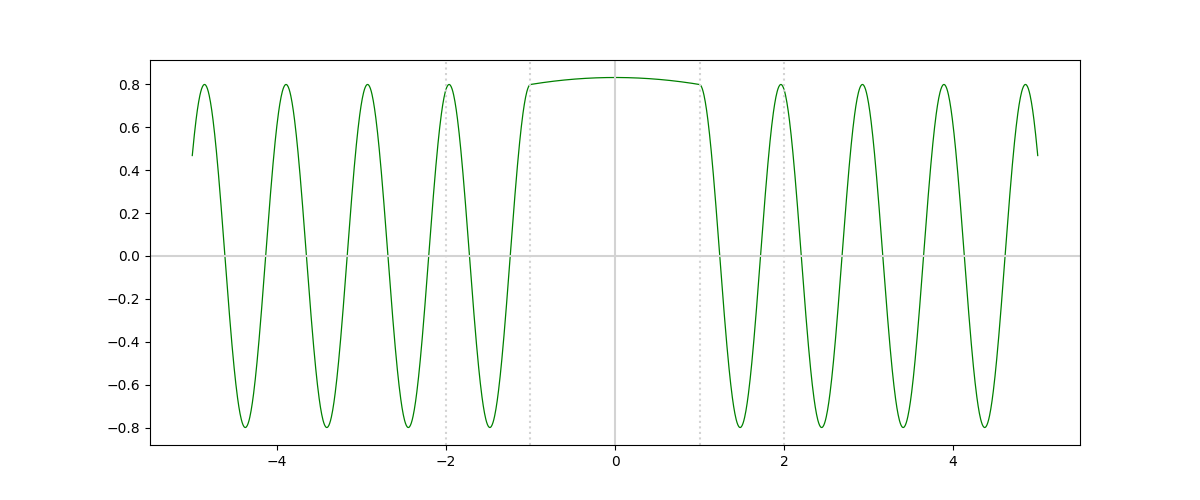

In [5]:
A.plot_field_1d(Fs1, plot_axis=True, xs=np.linspace(-5,5,2000), linewidth=.9, color='g', part='real')


## There is another class of radiation modes

Similar to 1-sided radiation modes.  These are modes with cosh and sinh as functions in center region.  Propagation constants beta lie in klow to khigh

In [6]:
beta = .9*A.K_high
Z = A.Z_from_Beta(beta, n=A.ns[1])
Z

5.179784190350306j

In [7]:
Fs1 = A.fields(beta, field_type=field_type, mode_type=mode_type)
# Fs1 = A.fields(Z, field_type=field_type, mode_type=mode_type, Z_plane=True)


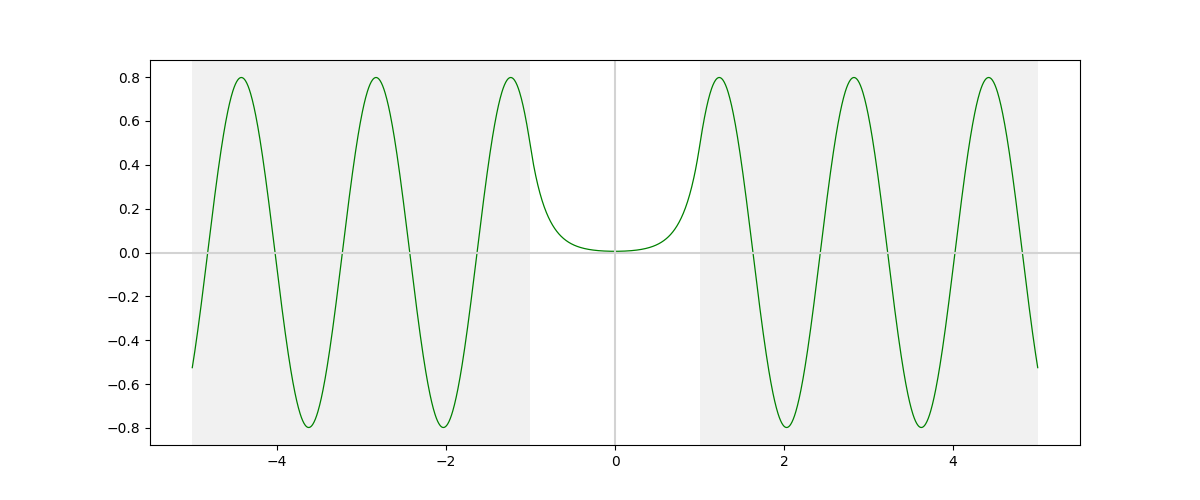

In [10]:
A.plot_field_1d(Fs1, plot_axis=True, xs=np.linspace(-5,5,2000), linewidth=.9, color='g', part='real',
               plot_regions=True, hatch=None, plot_Rhos=False,
               )


### Now set up to get these just using Zs by moving from n0 = min(ns) to n0 = max(ns[[0, -1]])

In [9]:
# Shift occurs at Z = K0 (n0**2 - n_low **2) ** .5 = A.Z_hyperbolic
Z = 1.001 * A.Z_hyperbolic


In [10]:
Fs1 = A.fields(Z, field_type=field_type, mode_type=mode_type, Z_plane=True)


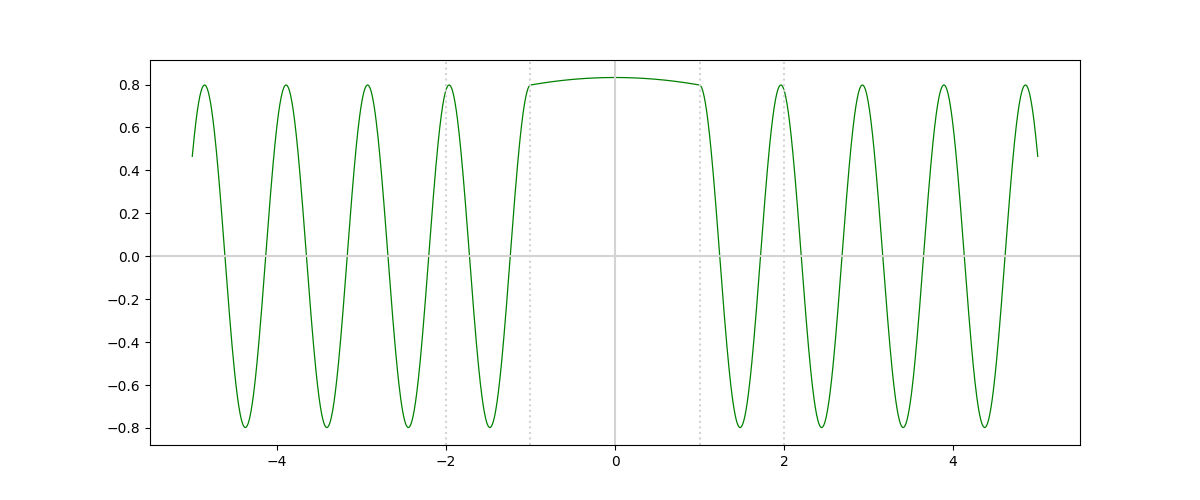

In [11]:
A.plot_field_1d(Fs1, plot_axis=True, xs=np.linspace(-5,5,2000), linewidth=.9, color='g', part='real')


### Animation as function of beta

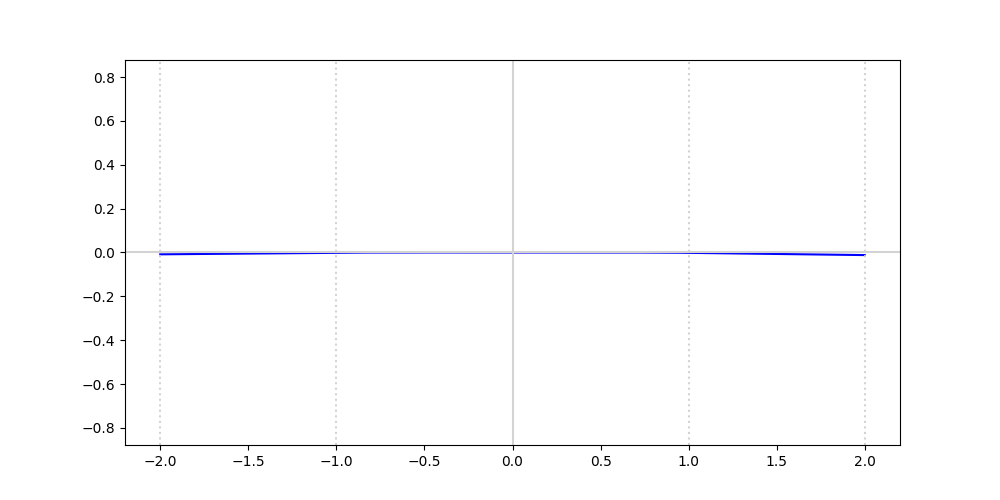

In [9]:
A.radiation_mode_beta_animation('hollow_core_radaition_mode_beta_animation', figsize=(10,5), fps=32, secs=4, sign='1',
                                
                               beta_range=[1.0001* A.K_low, .999999*A.K_high])

In [35]:
from IPython.display import HTML


HTML("""
<video alt="test" controls id="theVideo">
        <source src="hollow_core_radaition_mode_beta_animation.mp4" type="video/mp4">
</video>

<script>
video = document.getElementById("theVideo")
video.playbackRate = .5;
</script>
""")